#### Employee Attrition
    - Is there ways to find out if an employee will leave an organization? 
    - What are the factors that lead to higher employee attrition rate?
    - what are the factors that lead to employee attrition?


Exploratory Data Analysis (EDA)
 - Univariate  Analysis
    - Missing values 
    - Normality check
    - Categorical to Numerical data conversion (Encoding)
    - outliers detection
 - Bivariate Analysis
    - correlation check
    - outliers detection
 - Feature Engineering
 - Modeling & parameter evaluation


In [1]:
# df = pd.read_sql_query(sql = 'select * from TableA;', con = conn)

## factors that lead an employee attrition
- work-life balance
- salary
- travel oppertunities
- hike/promotion
- distance from home to office 
- technology/ skill upgrad
- open oppertunities
- relationship with boss
- work envionment
- duration within an organisation
- job roles
- onsite
- overtime
- more pressure
- quality of work
- work satisfied
- 

In [2]:
## import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('Employee-Attrition.csv')
df.head()


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.shape 

(1470, 35)

In [6]:
df.Attrition.unique() # target variable

array(['Yes', 'No'], dtype=object)

In [7]:
## EDA 
# univariate
# Missing values handling 
df.isnull().sum()
### How do we handle missing values?
#  - dropping (rows/columns)
#  - filling (mean/median/mode/random values(between +-2sigma (standard deviation)))
#  - filling with a predicitive model

### if missing values in rows; should we drop all the rows with any missing values? (NO/depends)
## 1) could discard significant columns info
## 2) could discard target records info  

### column - wise
## 1) percentage of missing of missing values in each column
## 2) column significant wrt. target 
## 3) if missing values above or equal to 70%, drop the column
###  a) if below 70%, what are the cases possible?
#### if continuous: mean|median? if percentage of misssing values is minimal then only, use mean or median approach else stick to predictive model or filling with ransom numbers between 2 standard deviations. 
#### if categrorical/numerical discrete: mode? (defination of outliers in categorical data)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Exploratory Data Analysis (EDA)
# Univariate Analysis
# Missing values
# Normality check
# Categorical to Numerical data conversion (Encoding)
# outliers detection
# Bivariate Analysis
# correlation check
# outliers detection

In [10]:
##  Normality check
numerical_features = df.select_dtypes(include = np.number).columns
categorical_features = df.drop('Attrition', axis = 1).select_dtypes(include=np.object).columns
print(numerical_features)
print(categorical_features)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


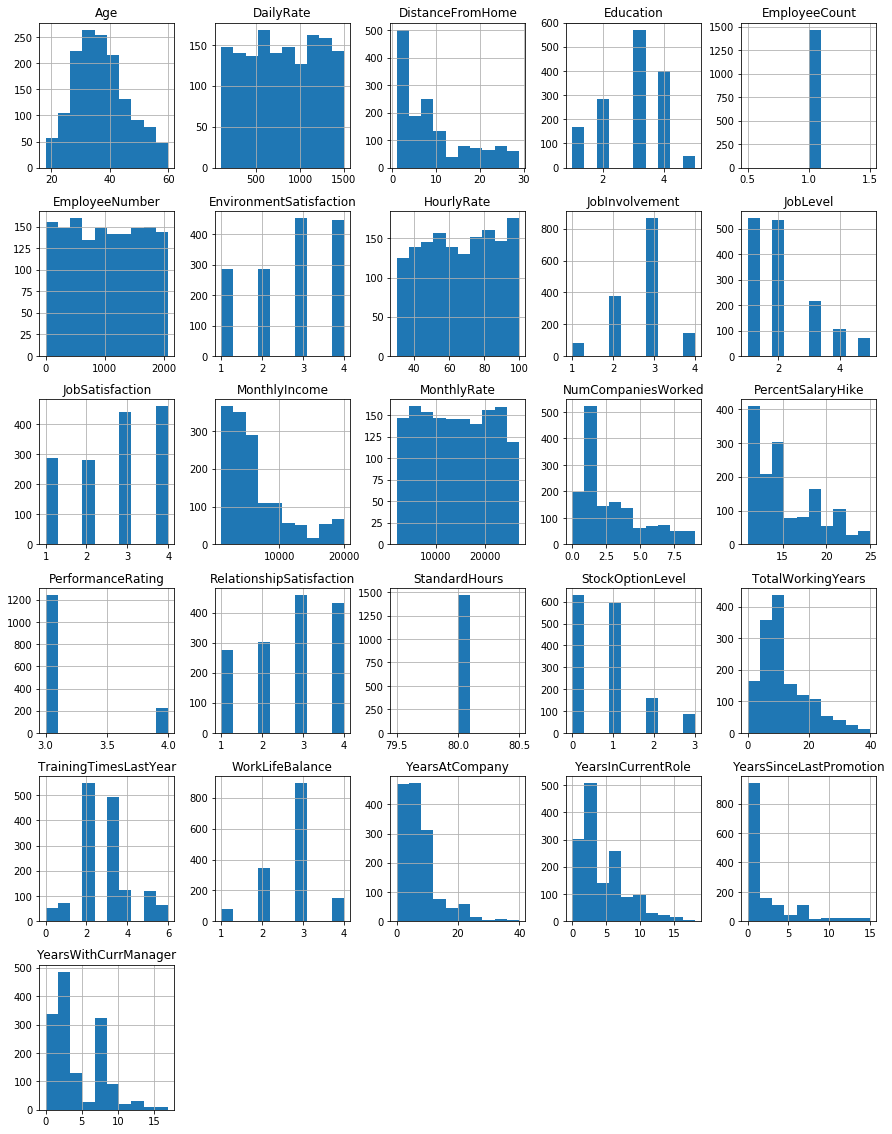

In [16]:
df[numerical_features].hist(figsize=(15,20))
plt.show()

In [17]:
df.StandardHours.unique()

array([80])

In [18]:
df.EmployeeCount.unique()

array([1])

In [20]:
categorical_features

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

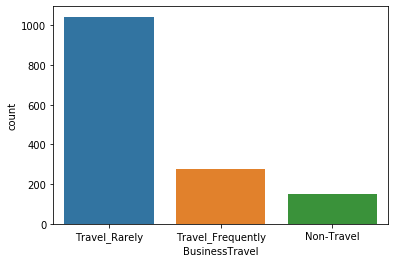

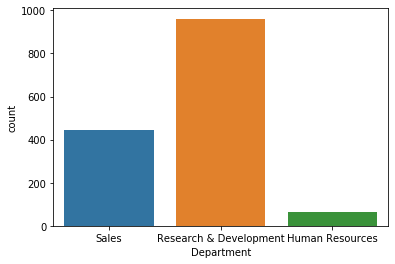

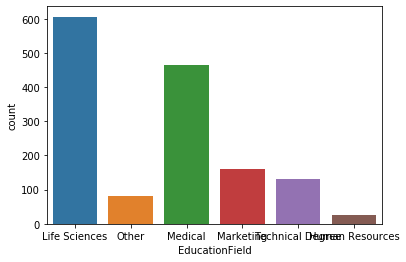

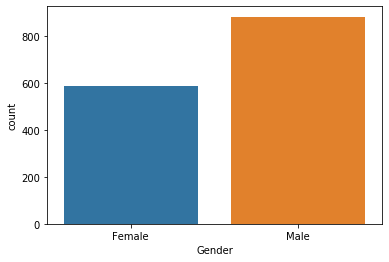

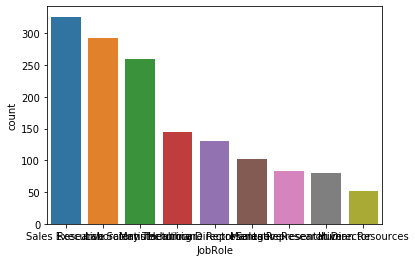

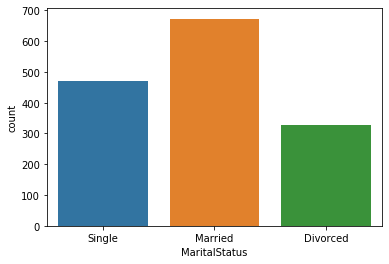

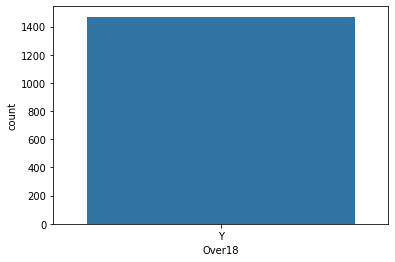

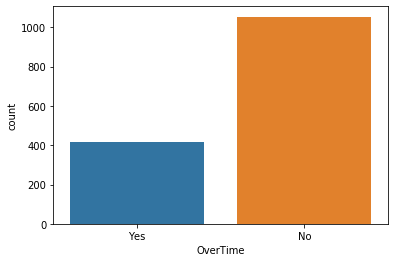

In [22]:
for each in categorical_features:
    sns.countplot(each, data = df)
    plt.show()

### columns to be dropped
    'EmployeeNumber' => this is nominal data 
    'StandardHours' => zero variance
    'EmployeeCount'=> zero variance
    'DailyRate', 'HourlyRate' & 'MonthlyRate' should be correlated (further analysis required)
    'Over18' => zero variance

In [23]:
# dropping columns
df.drop(['EmployeeNumber','StandardHours','EmployeeCount','Over18'], axis = 1, inplace = True)

In [24]:
df.shape

(1470, 31)

In [25]:
#####'Department'
100/1400 # not outlier


0.07142857142857142

In [26]:
#### EducationField
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [29]:
for each in df.EducationField.unique():
    print(each,df[df.EducationField==each].shape[0]/df.shape[0])

Life Sciences 0.4122448979591837
Other 0.055782312925170066
Medical 0.31564625850340133
Marketing 0.10816326530612246
Technical Degree 0.08979591836734693
Human Resources 0.018367346938775512


In [30]:
### JobRole (Find out JobRole which has features_stats closure to "Human Resources")
for each in df.JobRole.unique():
    print(each,df[df.JobRole==each].shape[0]/df.shape[0])

Sales Executive 0.2217687074829932
Research Scientist 0.19863945578231293
Laboratory Technician 0.1761904761904762
Manufacturing Director 0.09863945578231292
Healthcare Representative 0.0891156462585034
Manager 0.06938775510204082
Sales Representative 0.05646258503401361
Research Director 0.05442176870748299
Human Resources 0.03537414965986395


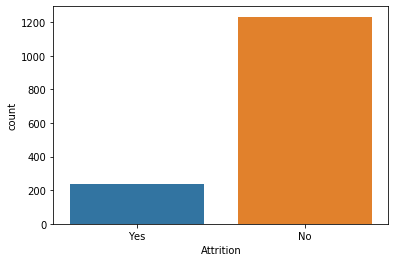

In [31]:
#### what is the defination of imbalanced dataset?
### Is the data imbalanced? 
sns.countplot('Attrition',data = df) # Target variable

In [33]:
#~ 200/1400 (cases of 'Yes')
## How to handle imbalanced dataset? using under-sampling/over-sampling 
# 2-> YES (Minority class)
# 98-> NO (Majority class)
# SMOTE
# classimblearn (explroxe)

In [34]:
#### Categorical to Numerical data conversion (Encoding)
categorical_features

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

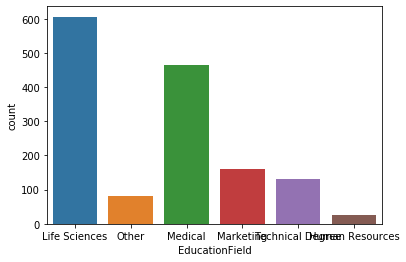

In [46]:
var = 'EducationField'
sns.countplot(var, data = df) # label encoding
    

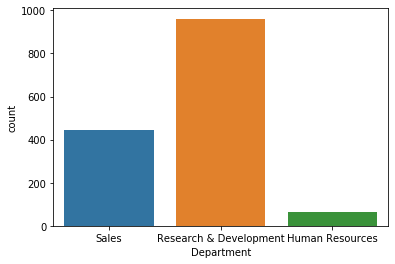

In [38]:
var = 'Department'
sns.countplot(var, data = df) #
    

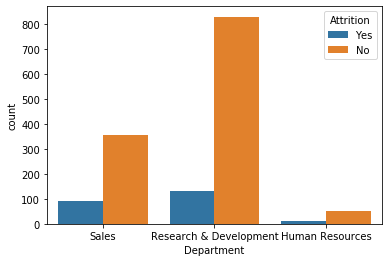

In [42]:
var = 'Department'
sns.countplot(var, data = df, hue= 'Attrition') # Label Encoding
    

In [39]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [41]:
df[df.Department=='Research & Development']['JobRole'].unique()

array(['Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative',
       'Research Director', 'Manager'], dtype=object)

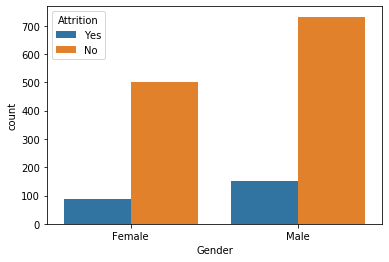

In [43]:
var = 'Gender'
sns.countplot(var, data = df, hue='Attrition') #
    

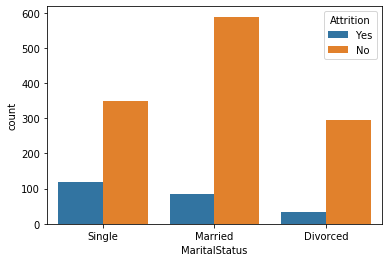

In [44]:
var = 'MaritalStatus'
sns.countplot(var, data = df, hue='Attrition') #
    

In [ ]:
# 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
#        'MaritalStatus', 'OverTime'
# OHE

In [ ]:
# ## 
# data -> 
# 1.nominal data (OHE)
# 2. interval/rank data (label encoding)


In [ ]:
# Exploratory Data Analysis (EDA)
# Univariate Analysis
# Missing values
# Normality check
# Categorical to Numerical data conversion (Encoding)
# outliers detection
# Bivariate Analysis
# correlation check
# outliers detection

In [49]:
numerical_features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [50]:
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 
        'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

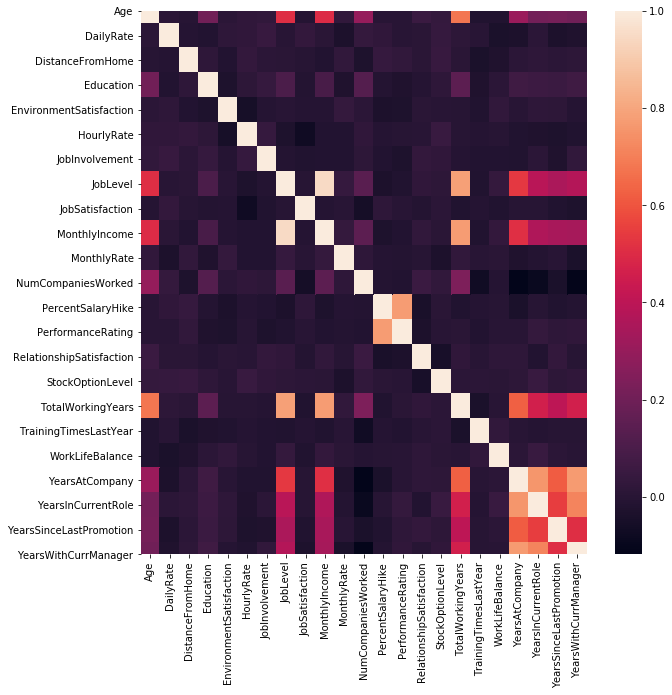

In [53]:
#### correlation check

plt.figure(figsize=(10,10))
sns.heatmap(df[numerical_features].corr(),)

In [ ]:
### key insights:


In [55]:
df.PerformanceRating.unique()

array([3, 4])

In [57]:
### 
print(df[df.Attrition=='Yes']['PerformanceRating'].unique())
print(df[df.Attrition=='No']['PerformanceRating'].unique())

[3 4]
[4 3]


In [72]:
# numerical_features

In [ ]:
list_num_features = ['Age','DailyRate','DistanceFromHome','HourlyRate',
                    'JobInvolvement','MonthlyIncome','MonthlyRate']

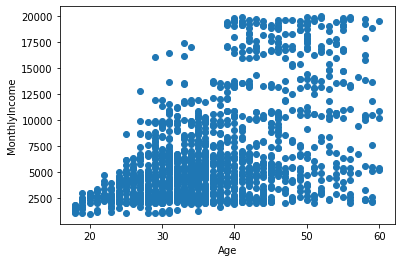

In [67]:
plt.scatter(df['Age'],df['MonthlyIncome'])
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()

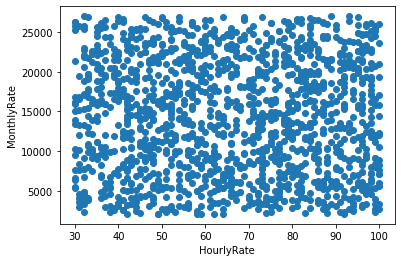

In [68]:
plt.scatter(df['HourlyRate'],df['MonthlyRate'])
plt.xlabel('HourlyRate')
plt.ylabel('MonthlyRate')
plt.show()

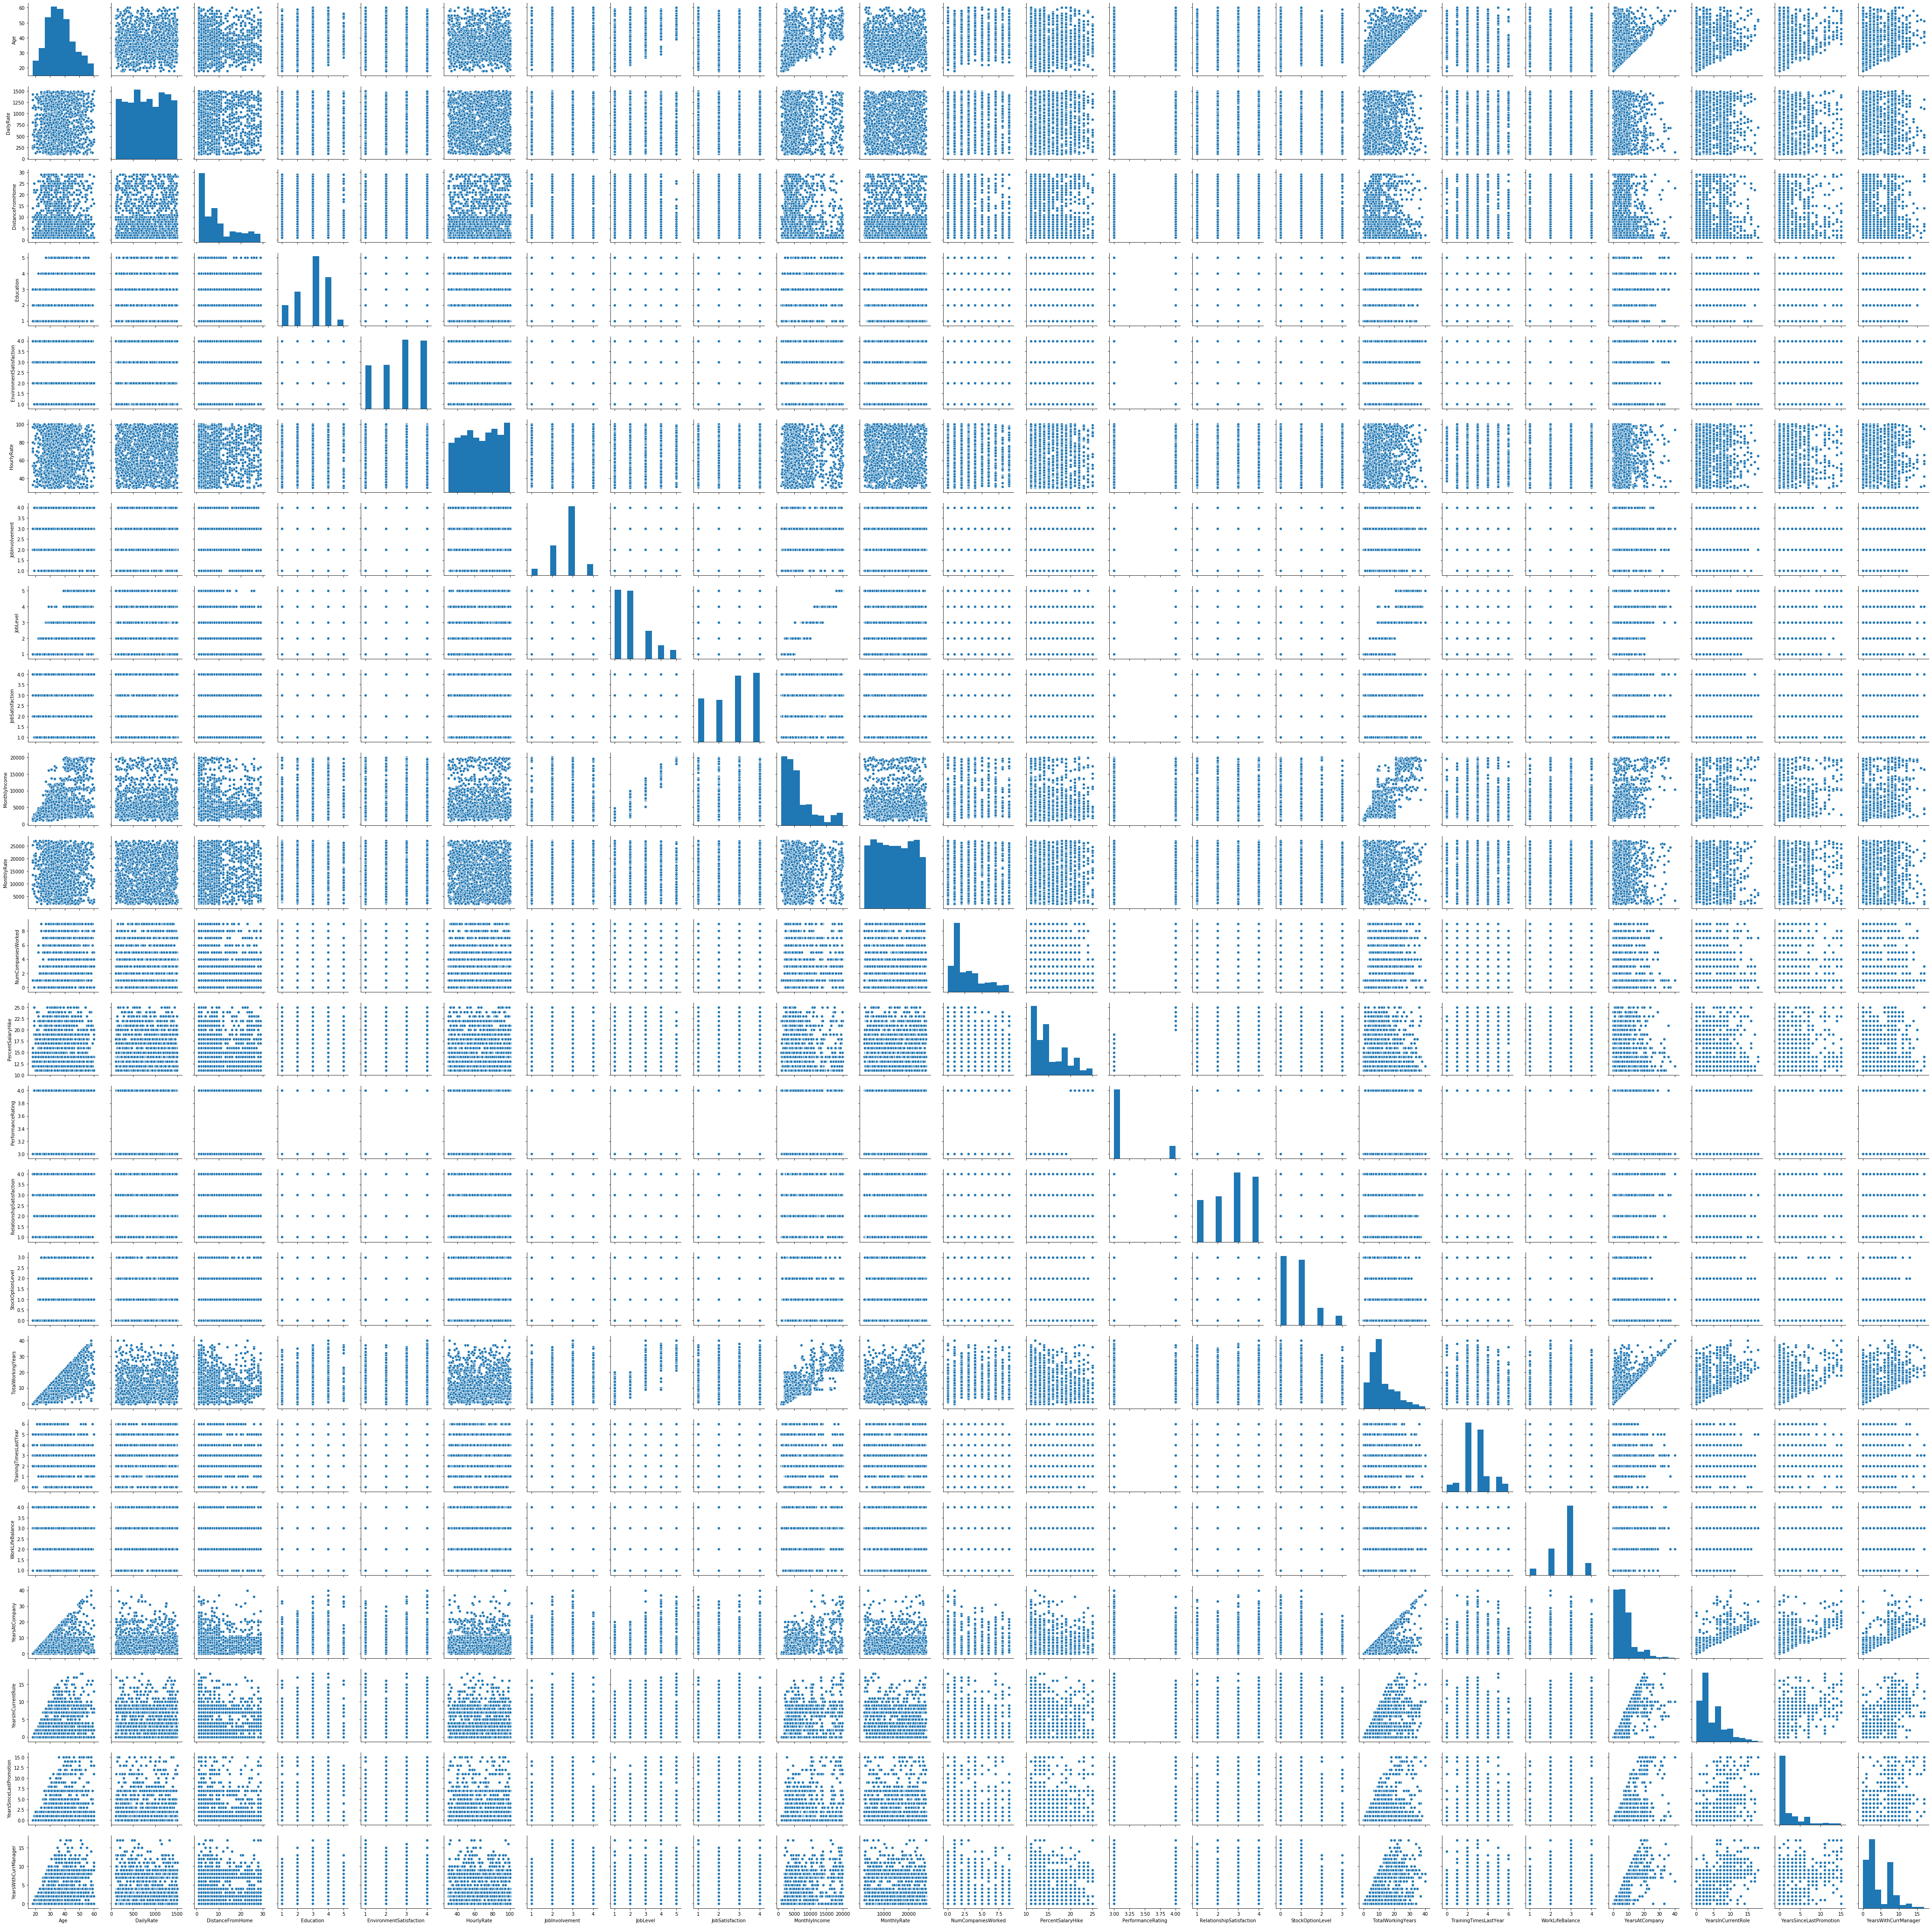

In [63]:
sns.pairplot(df[numerical_features]) 

In [69]:
### 

# Target Encoding (YES->1, 'NO'->0)
df['Atttition'] = df.Attrition.map({'Yes':1,'No':0})
df = pd.get_dummies(df) ## OHE encoding

In [71]:
print(df.shape)
df.head()

(1470, 54)


Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                      0                     1            0             1  
1                      1                     0            1             0  
2                      0                     1            0             1  
3                      1                     0            0             1  
4                      1                     0            1             0  

[5 rows x 54 columns]

In [ ]:
### Pre-processing 


